# 1. Import libraries and data

In [47]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


In [31]:
# get_path = os.path.abspath("")
project_path = "d:\\PYTHON\\CS_Bootcamp\\programs\\cs-intrusion-detection-system"

# add path to load own functions from .py files in scrips folder
sys.path.insert(0, project_path + '\scripts')

from preprocessing import *

In [ ]:
# constants and names 
file_name_train_data = "KDDTrain+.txt"
file_name_test_tata = "KDDTest+.txt"

#  column names
column_names = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "attack_type",
    "difficulty_level"
]

In [9]:
# load data as df
train_data = pd.read_csv("../data/"+ file_name_train_data,  names=column_names)
test_data = pd.read_csv("../data/"+ file_name_test_tata, names=column_names)

In [10]:
# Dimensions of dfs
print(f'The training data frame has {train_data.shape[0]} rows and {train_data.shape[1]} columns.')
print(f'The test data frame has {test_data.shape[0]} rows and {test_data.shape[1]} columns.')
train_data.head()

The training data frame has 125973 rows and 43 columns.
The test data frame has 22544 rows and 43 columns.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# 2. Data cleaning

In [ ]:
# Check missing values
na_train = train_data.isna().sum().sum()
na_test = test_data.isna().sum().sum()
print(f'There are {na_train} missing values in the training data and {na_test} missing values in the test data.')


There are 0 missing values in the training data and 0 missing values in the test data.


In [ ]:
# Check duplicated values
dupes_train = train_data.duplicated().sum()
dupes_test = test_data.duplicated().sum()
print(f'There are {dupes_train} duplicated values in the train data and {dupes_test} duplicated values in the test data.')

There are 0 duplicated values in the client data and 0 duplicated values in the test data.


# 3.  Check data types 
- convert categorical variables to categorical data types 
- inspect data types with `.info()`
- count number of unique values with `.nunique()`
- inspect unique valuues with `.unique()`

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [14]:
# getting unique values for each column to get an idea about numerical/categorical features
train_data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [15]:
train_data.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [16]:
train_data.service.unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [17]:
train_data.flag.unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [19]:
train_data.attack_type.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [20]:
train_data.difficulty_level.unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4])

In [35]:
# categorical features 
bool_features = ["land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]
cat_features = ["protocol_type", "service", "flag", "attack_type"]

In [ ]:
# convert to str
train_data = convert_column_type(train_data, cat_features, str)

# convert bool to int
train_data = convert_column_type(train_data, bool_features, int)

# convert to category
train_data = convert_column_type(train_data, cat_features + bool_features, 'category') 

# check conversions
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

# 4. EDA - data exploration

## 4.1 Inspect target variable `attack_type` 
- What is the overall rate of normal vs malicous network traffic?

In [100]:
df_attack_type_proportions = train_data.attack_type.value_counts(normalize=True).reset_index()
df_normal_attacks = df_attack_type_proportions[df_attack_type_proportions.attack_type == "normal"].proportion * 100

print(f"In the training data there is {round(df_normal_attacks.values[0],2)} % normal network traffic.\n")
print(df_attack_type_proportions)

In the training data there is 53.46 % normal network traffic.

        attack_type  proportion
0            normal    0.534583
1           neptune    0.327165
2             satan    0.028840
3           ipsweep    0.028570
4         portsweep    0.023267
5             smurf    0.021005
6              nmap    0.011852
7              back    0.007589
8          teardrop    0.007081
9       warezclient    0.007065
10              pod    0.001596
11     guess_passwd    0.000421
12  buffer_overflow    0.000238
13      warezmaster    0.000159
14             land    0.000143
15             imap    0.000087
16          rootkit    0.000079
17       loadmodule    0.000071
18        ftp_write    0.000064
19         multihop    0.000056
20              phf    0.000032
21             perl    0.000024
22              spy    0.000016


- What is the distribution of different attack types?

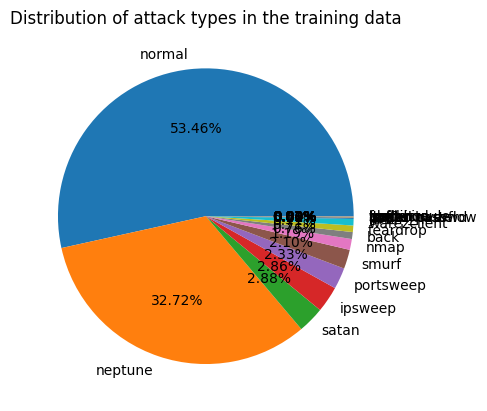

In [73]:
plt.pie(df_attack_type_proportions.proportion, 
        labels = df_attack_type_proportions.attack_type,
        #explode = pie_pieces,
        autopct='%1.2f%%',          # format and display percentages
        #colors=['steelblue', '#E42A38'],
            )
    
plt.title('Distribution of attack types in the training data')
plt.show()

Summarize attacks that occur in less than 1% to 'other' category (for prettier plotting)

In [104]:
# add new category
df_attack_type_proportions.attack_type = df_attack_type_proportions.attack_type.cat.add_categories(["other"])
# add attack types to category based on their proportion 
df_attack_type_proportions.loc[df_attack_type_proportions.proportion < 0.01, "attack_type"] = 'other'

In [ ]:
# sum up values of new category "other" and sort values for plotting
df_reduced_cat = df_attack_type_proportions.groupby("attack_type", observed=True, as_index=False).proportion.sum()
df_reduced_cat.sort_values("proportion", ascending=False, inplace=True)
df_reduced_cat

,attack_type,proportion
3,normal,0.534583
1,neptune,0.327165
5,satan,0.028840
0,ipsweep,0.028570
7,other,0.024720
4,portsweep,0.023267
6,smurf,0.021005
2,nmap,0.011852


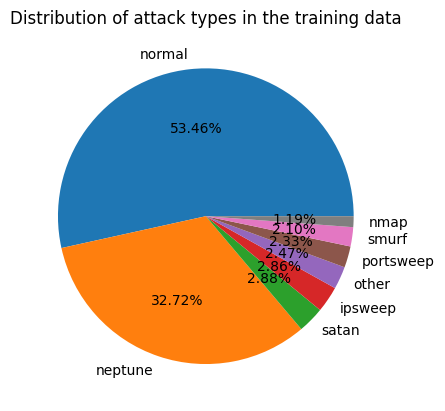

In [115]:
plt.pie(df_reduced_cat.proportion, 
    labels = df_reduced_cat.attack_type,
    #explode = pie_pieces,
    autopct='%1.2f%%',          # format and display percentages
    #colors=['steelblue', '#E42A38'],
        )
    
plt.title('Distribution of attack types in the training data')
plt.show()

Summarize the different attack types into categories of attacks:
1. Denial of Service (DoS)
2. Scanning/Reconnaissance (Probe)
3. Remote to local (R2L)
4. User to Root Escalation (U2R)

In [ ]:
# assign attack types to 4 categories + 'normal' and create a new colum attack_categories 

attack_categories = {
    "no": ["normal"],
    "dos": ["back", "land", "neptune", "pod", "smurf", "teardrop", "apache2", "udpstorm", "processtable", "mailbomb"],
    "probe" : ["satan", "ipsweep", "nmap", "portsweep", "mscan", "saint"], 
    "r2l": ["guess_passwd", "ftp_write", "imap", "phf", "multihop", "warezmaster", "warezclient", "spy", "xlock", "xsnoop", "snmpguess", "snmpgetattack", "httptunnel", "sendmail", "named"],
    "u2r" : ["rootkit", "buffer_overflow", "loadmodule", "perl", "sqlattack", "xterm", "ps"],
    }

# using dict comprehension
mapping = {cat: type for type, cats in attack_categories.items() for cat in cats}


dict_items([('no', ['normal']), ('dos', ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'mailbomb']), ('probe', ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']), ('r2l', ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']), ('u2r', ['rootkit', 'buffer_overflow', 'loadmodule', 'perl', 'sqlattack', 'xterm', 'ps'])])

In [ ]:
# add new cols to df
train_data["attack_category"]= train_data.attack_type.map(mapping)  # 5 attack ategories (instead of 23)
train_data["attack"]= [0 if x == "normal" else 1 for x in train_data.attack_type] # binary target variable (attack 1, no attack 0)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty_level,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,no
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,no
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,no
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,no


In [ ]:
# convert newl cols to categories
# convert to str
train_data = convert_column_type(train_data, "attack_category", str)

# convert bool to int
train_data = convert_column_type(train_data, "attack", int)

# convert to category
train_data = convert_column_type(train_data, ["attack_category" , "attack"], 'category') 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

In [116]:
df_attack_cat = train_data.attack_category.value_counts(normalize=True).reset_index()
df_attack_cat

,attack_category,proportion
0,no,0.534583
1,dos,0.364578
2,probe,0.092528
3,r2l,0.007899
4,u2r,0.000413


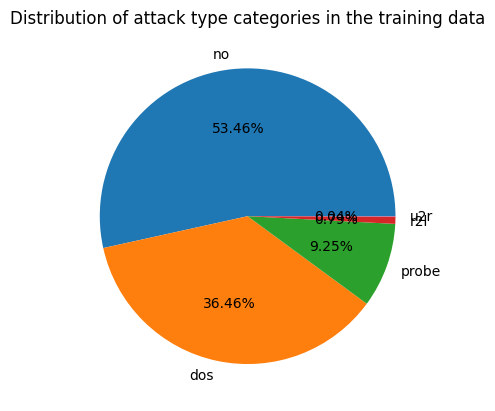

In [118]:
plt.pie(df_attack_cat.proportion, 
        labels = df_attack_cat.attack_category,
        #explode = pie_pieces,
        autopct='%1.2f%%',          # format and display percentages
        #colors=['steelblue', '#E42A38'],
            )
    
plt.title('Distribution of attack type categories in the training data')
plt.show()